In [1]:
import pandas as pd

In [2]:
base_dir = "/Users/LoboM/Dropbox/sharedUMass_Macrina_Rene/pharynx_figures_JUN25/FIG_3_distal/csvs/"

In [3]:
custom_order = ["C18","C19","C21","C22","C13","C12","C10","C9","C11","C14","C15","C8","C3","C4","C5","C6","C7","C1","C2","C20","C16","C17"]



In [4]:
info = {}
net_sz = pd.DataFrame(index=custom_order)
net_color = pd.DataFrame(index=custom_order)
for entry in custom_order:
    clus =  str(entry) + '_regulators.csv'
    info[str(entry)] = pd.read_csv(base_dir + clus,index_col=0)
    net_info_tmp = info[str(entry)][info[str(entry)]['TFRegulator']=='YES']
    
    for entry2 in net_info_tmp['gene']:
        if entry2 in net_sz.columns:
            net_sz.loc[str(entry),entry2] = list(net_info_tmp.loc[net_info_tmp['gene']==entry2,'cor'])[0]
            net_color.loc[str(entry),entry2] = list(net_info_tmp.loc[net_info_tmp['gene']==entry2,'clustermax'])[0]
        else:
            net_sz[entry2] = 0
            net_color[entry2] = 0
            net_sz.loc[str(entry),entry2] = list(net_info_tmp.loc[net_info_tmp['gene']==entry2,'cor'])[0]
            net_color.loc[str(entry),entry2] = list(net_info_tmp.loc[net_info_tmp['gene']==entry2,'clustermax'])[0]

In [6]:
net_info_tmp

,prefix,motif,MotifMatrix_name,prefix_original,gene,GENE,cor,clustermax,TFRegulator
2,SIX,Six2_2,Six2_2,Six,Six1,SIX1,0.783557,3.618116,YES
3,FOXA,Foxa2_2,Foxa2_2,Foxa,Foxa1,FOXA1,0.739647,3.674149,YES
4,NKX2-,Nkx2-6,Nkx2-6,Nkx2-,Nkx2-1,NKX2-1,0.721006,6.754881,YES
7,HOXA,Hoxa2_3,Hoxa2_3,Hoxa,Hoxa3,HOXA3,0.655610,6.547137,YES
8,SOX,Sox3_7,Sox3_7,Sox,Sox2,SOX2,0.613771,2.220312,YES
10,PAX,Pax8,Pax8,Pax,Pax8,PAX8,0.579962,4.680562,YES
13,NFIA,Nfia,Nfia,Nfia,Nfia,NFIA,0.491785,5.643321,YES
14,MEIS,Meis1_2,Meis1_2,Meis,Meis1,MEIS1,0.485253,6.033871,YES
15,ISL,Isl1,Isl1,Isl,Isl1,ISL1,0.472305,2.805516,YES
17,TEAD,Tead4,Tead4,Tead,Tead1,TEAD1,0.462530,2.199204,YES


In [5]:
info['C1']

,prefix,motif,MotifMatrix_name,prefix_original,gene,GENE,cor,clustermax,TFRegulator
1,TFAP2A,Tfap2a_5,Tfap2a_5,Tfap2a,Tfap2a,TFAP2A,0.787262,0.909035,NO
2,FOXA,Foxa2_2,Foxa2_2,Foxa,Foxa1,FOXA1,0.739647,10.707727,YES
3,GRHL,Grhl2,Grhl2,Grhl,Grhl3,GRHL3,0.687630,2.049593,NO
4,TRP,Trp63,Trp63,Trp,Trp63,TRP63,0.665286,3.773396,YES
5,HOXA,Hoxa2_3,Hoxa2_3,Hoxa,Hoxa3,HOXA3,0.655610,4.788177,YES
...,...,...,...,...,...,...,...,...,...
361,GABPA,Gabpa_2,Gabpa_2,Gabpa,Gabpa,GABPA,0.000789,0.000000,NO
362,ATF6B,Atf6b,Atf6b,Atf6b,Atf6b,ATF6B,0.000756,0.315298,NO
363,STAT5B,Stat5b,Stat5b,Stat5b,Stat5b,STAT5B,0.000535,0.793692,NO
364,MAFK,Mafk,Mafk,Mafk,Mafk,MAFK,0.000385,1.918452,NO


In [31]:
import anndata

In [32]:
adata = anndata.AnnData(X=net_color)

In [33]:
import scanpy as sc

In [34]:
adata.obs['cluster'] = [entry[1:] for entry in adata.obs.index]

In [35]:
adata.obs['cluster']

C18    18
C19    19
C21    21
C22    22
C13    13
C12    12
C10    10
C9      9
C11    11
C14    14
C15    15
C8      8
C3      3
C4      4
C5      5
C6      6
C7      7
C1      1
C2      2
C20    20
C16    16
C17    17
Name: cluster, dtype: object

In [36]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


sc.settings.set_figure_params(dpi=160)
plt.rcParams['figure.figsize']=(8,16) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()


sc.pl.DotPlot.DEFAULT_COLORMAP = 'plasma'

-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.1
-----
PIL                 7.1.2
anndata             0.7.6
appnope             0.1.0
attr                19.3.0
backcall            0.2.0
cached_property     1.5.2
cairo               1.19.1
cffi                1.14.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                3.1.0
idna                2.9
igraph              0.8.2
ipykernel           5.3.0
ipython_genutils    0.2.0
jedi                0.17.0
jinja2              2.11.2
joblib              0.15.1
jsonschema          3.2.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
llvmlite            0.32.1
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.2.2
mpl_toolkits        NA
natsort             7.0.1
nbformat            5.0.6
numba               0.49.1
numexpr             2.7.1
numpy               1.17.5
packaging           20.4
p

In [37]:
adata.obs['cluster']

C18    18
C19    19
C21    21
C22    22
C13    13
C12    12
C10    10
C9      9
C11    11
C14    14
C15    15
C8      8
C3      3
C4      4
C5      5
C6      6
C7      7
C1      1
C2      2
C20    20
C16    16
C17    17
Name: cluster, dtype: object

In [38]:
color_map = plt.cm.get_cmap('RdYlBu') # create a default Colormap.
reversed_color_map = color_map.reversed()

In [39]:
adata.obs

,cluster
C18,18
C19,19
C21,21
C22,22
C13,13
C12,12
C10,10
C9,9
C11,11
C14,14


In [40]:
p = sc.pl.DotPlot(adata,figsize=(8,16),cmap=reversed_color_map,var_names=adata.var.index,groupby='cluster',dot_color_df=net_color, dot_size_df=net_sz)

In [41]:
p.swap_axes() 

In [42]:
p.legend(show=True, show_size_legend=False, show_colorbar=False, size_title='Correlation', colorbar_title='Motif Score', width=1.5)

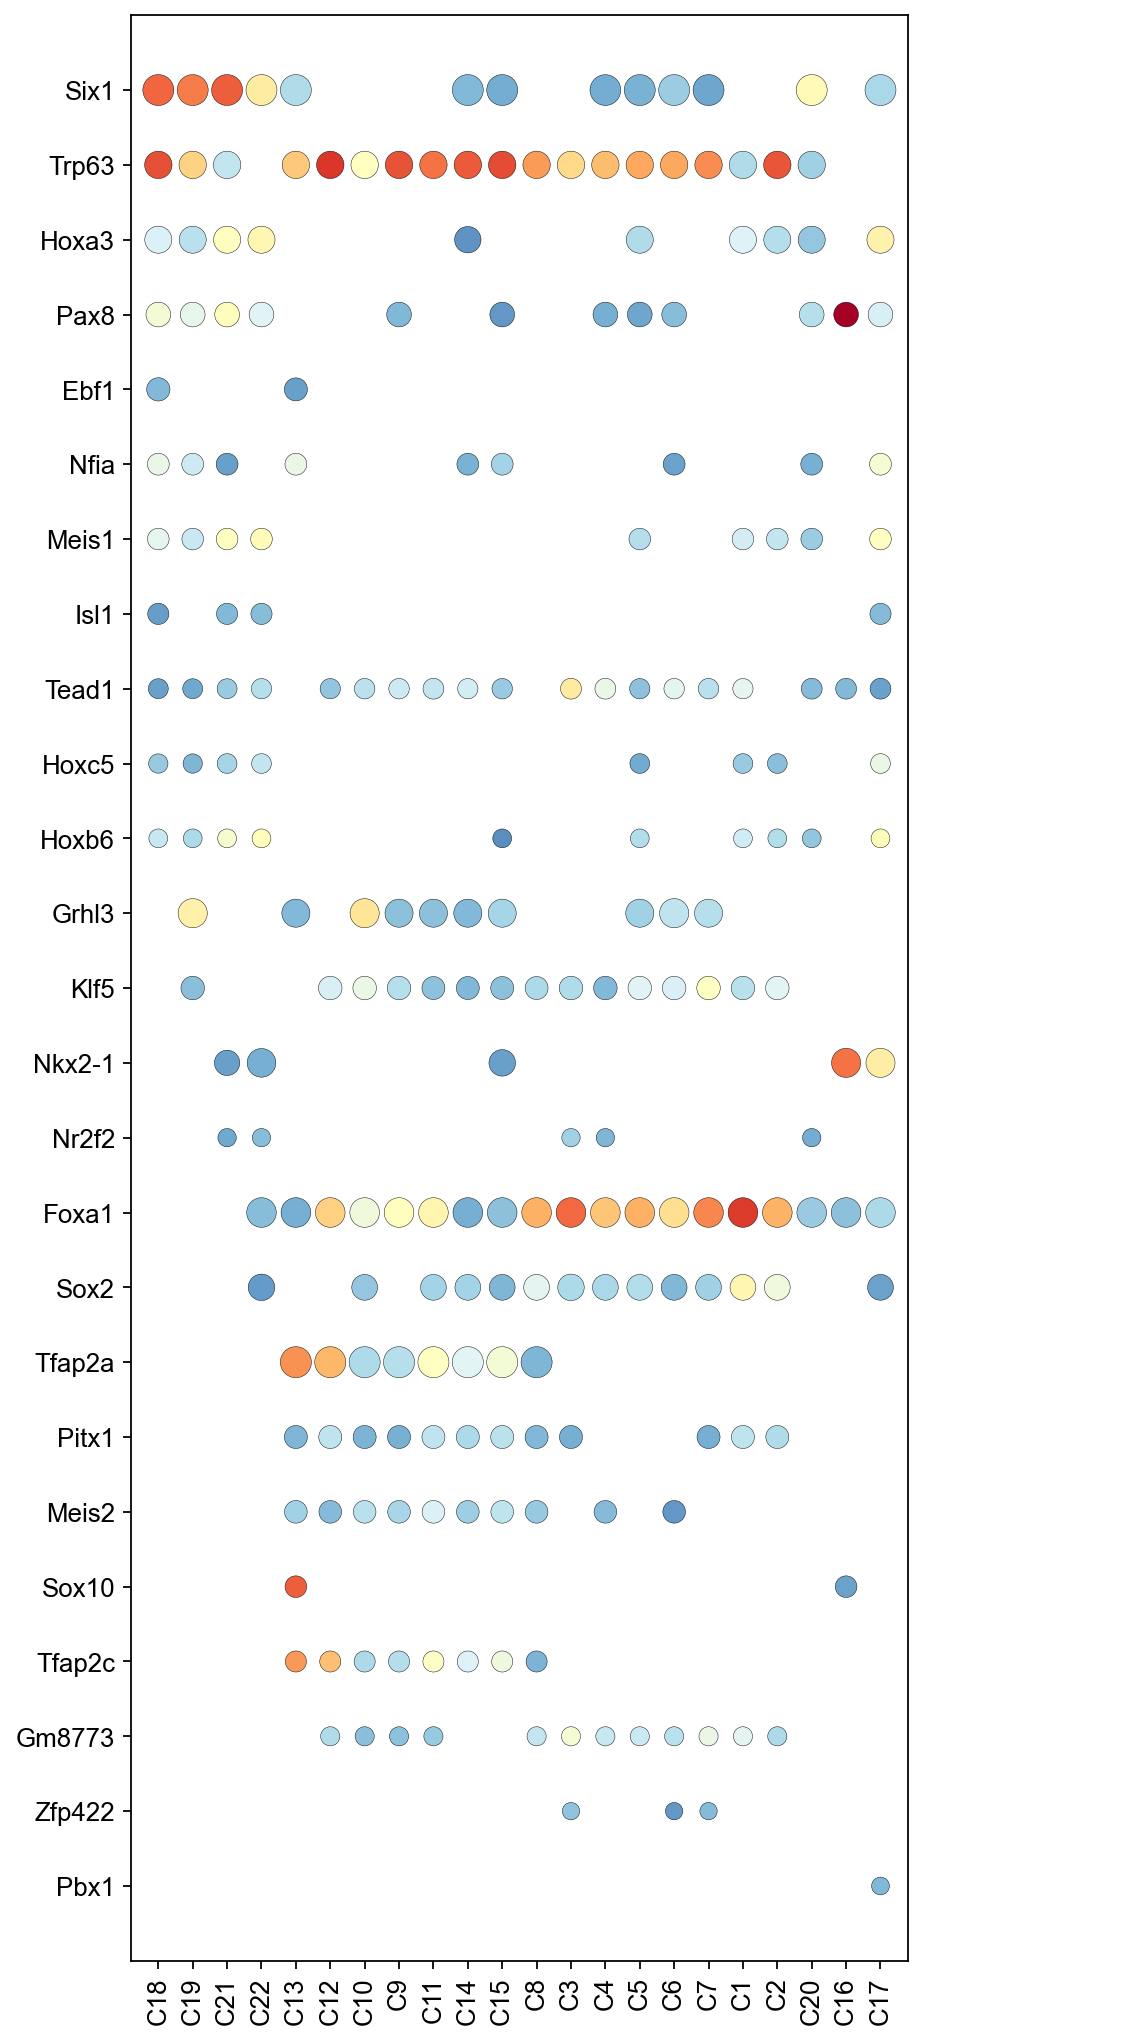

In [43]:
p.savefig("/Users/LoboM/Desktop/tmp_test_top_10_pct.pdf",figsize=(8,16))

In [44]:
p.legend(show=True, show_size_legend=True, show_colorbar=True, size_title='Correlation', colorbar_title='Motif Score', width=1.5)

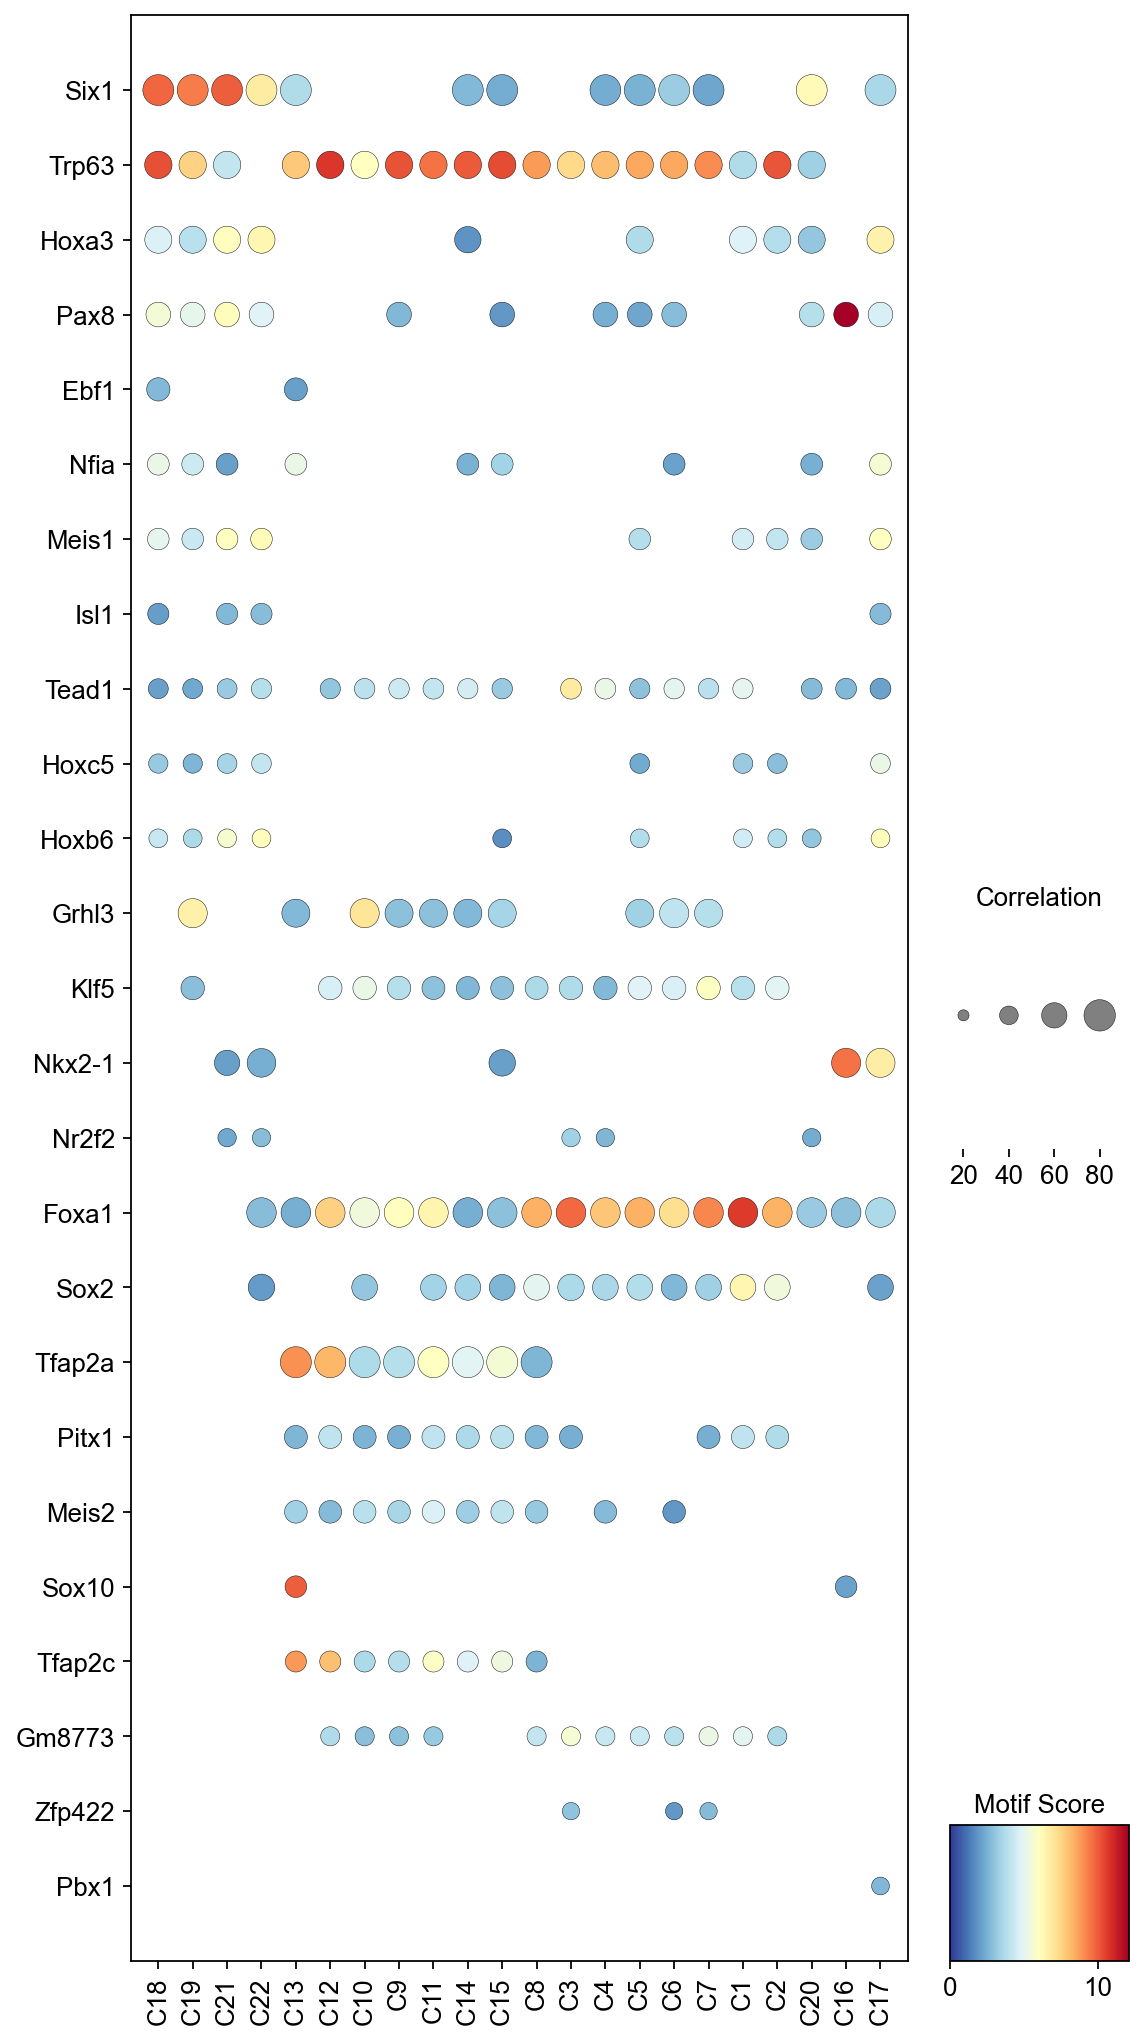

In [45]:
p.savefig("/Users/LoboM/Desktop/tmp_test_top_10_pct_distal_with_legend.pdf",figsize=(8,8))

- add motif name

In [83]:
adata.var.index

Index(['Foxa1', 'Trp63', 'Hoxa3', 'Sox2', 'Klf5', 'Pitx1', 'Meis1', 'Tead1',
       'Hoxc5', 'Gm8773', 'Hoxb6', 'Nr2f2', 'Zfp422', 'Six1', 'Pax8', 'Meis2',
       'Grhl3', 'Nfia', 'Tfap2a', 'Tfap2c', 'Ebf1', 'Sox10', 'Nkx2-1', 'Isl1',
       'Pbx1'],
      dtype='object')

In [113]:
max_cor = 0
max_cor_clus = 0
for gene in adata.var.index:
    max_cor = 0
    max_cor_clus = 0
    for entry in info.keys():
        if info[entry][info[entry]['gene'] == gene].shape[0] == 0:
            continue
        cur_cor = list(info[entry].loc[info[entry]['gene'] == gene,'cor'])[0]
        if cur_cor > max_cor:
            max_cor = cur_cor
            max_cor_clus = entry
    motif_insert = list(info[max_cor_clus].loc[info[max_cor_clus]['gene'] == gene,'MotifMatrix_name'])[0]
    print(max_cor_clus,info[max_cor_clus].loc[info[max_cor_clus]['gene'] == gene,['MotifMatrix_name','gene','cor']])
    adata.var.loc[gene,'MotifMatrix_name'] = motif_insert

C19   MotifMatrix_name   gene       cor
3            Foxa3  Foxa1  0.741733
C1   MotifMatrix_name   gene       cor
4            Trp63  Trp63  0.665286
C1   MotifMatrix_name   gene      cor
5          Hoxa2_3  Hoxa3  0.65561
C3   MotifMatrix_name  gene       cor
7           Sox4_2  Sox2  0.636284
C1   MotifMatrix_name  gene       cor
8           Klf1_5  Klf5  0.543277
C1   MotifMatrix_name   gene       cor
9          Pitx1_2  Pitx1  0.527641
C1    MotifMatrix_name   gene       cor
11          Meis1_2  Meis1  0.485253
C3    MotifMatrix_name   gene      cor
14            Tead4  Tead1  0.46253
C1    MotifMatrix_name   gene       cor
15          Hoxc9_3  Hoxc5  0.429431
C1    MotifMatrix_name    gene       cor
16           Gm5294  Gm8773  0.413351
C1    MotifMatrix_name   gene       cor
17          Hoxb4_3  Hoxb6  0.403975
C1    MotifMatrix_name   gene       cor
18            Nr2f6  Nr2f2  0.401369
C9    MotifMatrix_name    gene       cor
22         Zfp281_2  Zfp422  0.379594
C5   MotifMatr

In [114]:
adata.var.to_csv("gene_motif.csv") # used to get logos of these motifs in scATAC_13_Fig3c_logo